# A/B TEST

A/B testing helps in finding a better approach to finding customers, marketing products, getting a higher reach, or anything that helps a business convert most of its target customers into actual customers.

**Below are all the features in the dataset:**

- Campaign Name: The name of the campaign

- Date: Date of the record

- Spend: Amount spent on the campaign in dollars

- of Impressions: Number of impressions the ad crossed through the campaign
 
- Reach: The number of unique impressions received in the ad

- of Website Clicks: Number of website clicks received through the ads

- of Searches: Number of users who performed searches on the website

- of View Content: Number of users who viewed content and products on the website

- of Add to Cart: Number of users who added products to the cart

- of Purchase: Number of purchases

Two campaigns were performed by the company:

Control Campaign
Test Campaign

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [2]:
control = pd.read_csv('control_group.csv', delimiter=';')
test = pd.read_csv('test_group.csv', delimiter=';')

In [3]:
# Concatenando os DataFrames
dados = pd.concat([control, test])

print("DataFrame Concatenado:")
dados

DataFrame Concatenado:


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [4]:
dados.shape

(60, 10)

## TRATAMENTO DE DADOS

In [5]:
dados.shape

(60, 10)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        60 non-null     object 
 1   Date                 60 non-null     object 
 2   Spend [USD]          60 non-null     int64  
 3   # of Impressions     59 non-null     float64
 4   Reach                59 non-null     float64
 5   # of Website Clicks  59 non-null     float64
 6   # of Searches        59 non-null     float64
 7   # of View Content    59 non-null     float64
 8   # of Add to Cart     59 non-null     float64
 9   # of Purchase        59 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 5.2+ KB


In [7]:
dados.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [8]:
dados.duplicated().sum()

0

In [9]:
# Encontrando as linhas com valores nulos
linhas_com_nulos = dados[dados.isnull().any(axis=1)]

print("Linhas com valores nulos:")
print(linhas_com_nulos)

Linhas com valores nulos:
      Campaign Name       Date  Spend [USD]  # of Impressions  Reach  \
4  Control Campaign  5.08.2019         1835               NaN    NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
4            NaN  


In [10]:
# Eliminando linhas com valores nulos
dados_sem_nulos = dados.dropna()

print("DataFrame sem valores nulos:")
dados_sem_nulos.head(10)

DataFrame sem valores nulos:


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
10,Control Campaign,11.08.2019,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0


In [11]:
dados.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,60.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2425.750000,91775.881356,70868.644068,5682.593220,2321.813559,1900.169492,1087.220339,522.000000
std,381.130461,32465.070636,31023.653515,1754.777559,669.040576,687.263844,430.205246,196.973917
min,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000
25%,2073.750000,68853.500000,43230.000000,4227.500000,1962.500000,1249.000000,848.500000,340.000000
50%,2420.500000,95843.000000,76219.000000,5691.000000,2390.000000,1975.000000,1075.000000,501.000000
75%,2727.500000,117315.000000,95490.500000,7218.500000,2778.500000,2424.000000,1386.500000,693.000000
max,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000


In [12]:
dados.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

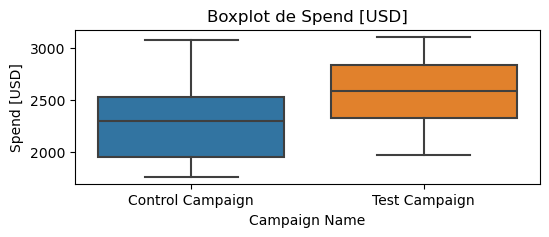

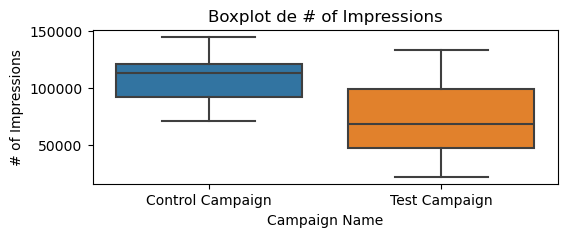

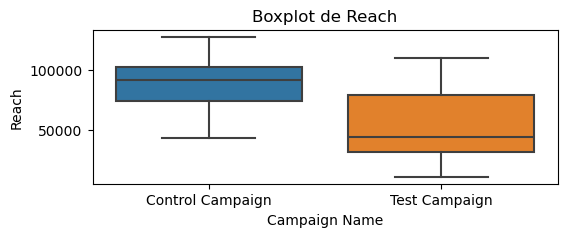

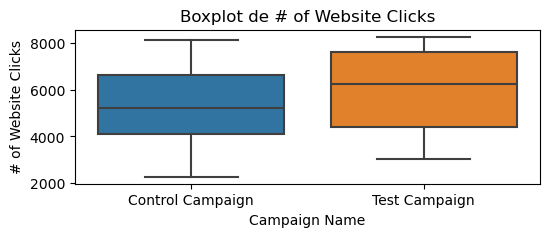

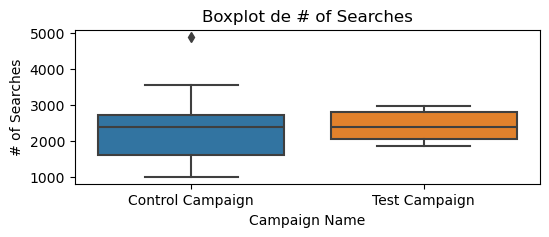

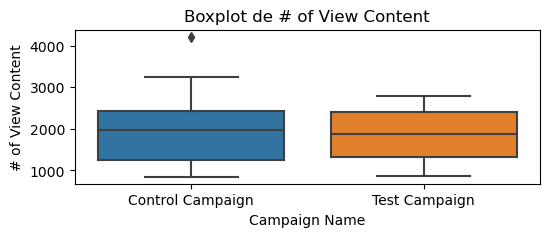

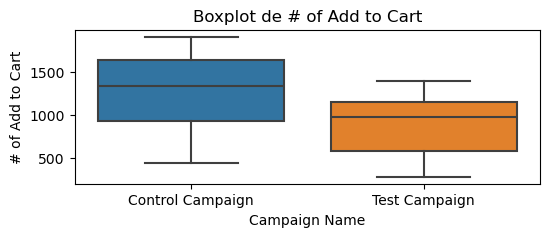

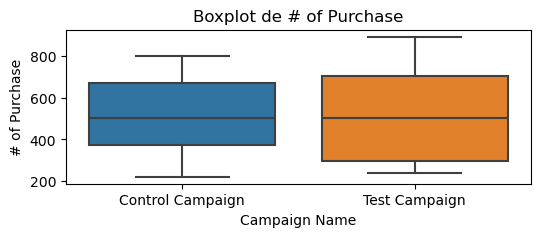

In [13]:
# Lista de colunas para plotar
colunas = ['Spend [USD]', '# of Impressions', 'Reach', 
           '# of Website Clicks', '# of Searches', '# of View Content', 
           '# of Add to Cart', '# of Purchase']

# Criando os gráficos de caixa para cada coluna
for coluna in colunas:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=dados, x='Campaign Name', y=coluna)
    plt.title(f'Boxplot de {coluna}')
    plt.show()

In [14]:
dados.groupby('Campaign Name')['# of Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Campaign Name,,,,,,,,
Control Campaign,29.0,522.793103,185.028642,222.0,372.0,501.0,670.0,800.0
Test Campaign,30.0,521.233333,211.047745,238.0,298.0,500.0,701.0,890.0


As estatísticas para a campanha de controle e de teste parecem bem semelhantes, precisamos testar se as variáveis em questão tem relação com "# of Purchase"

Pelo gráfico descobrimos que: 

- of Add to Cart (mais relação positiva)

- of Website Clicks (menos correlação positiva)

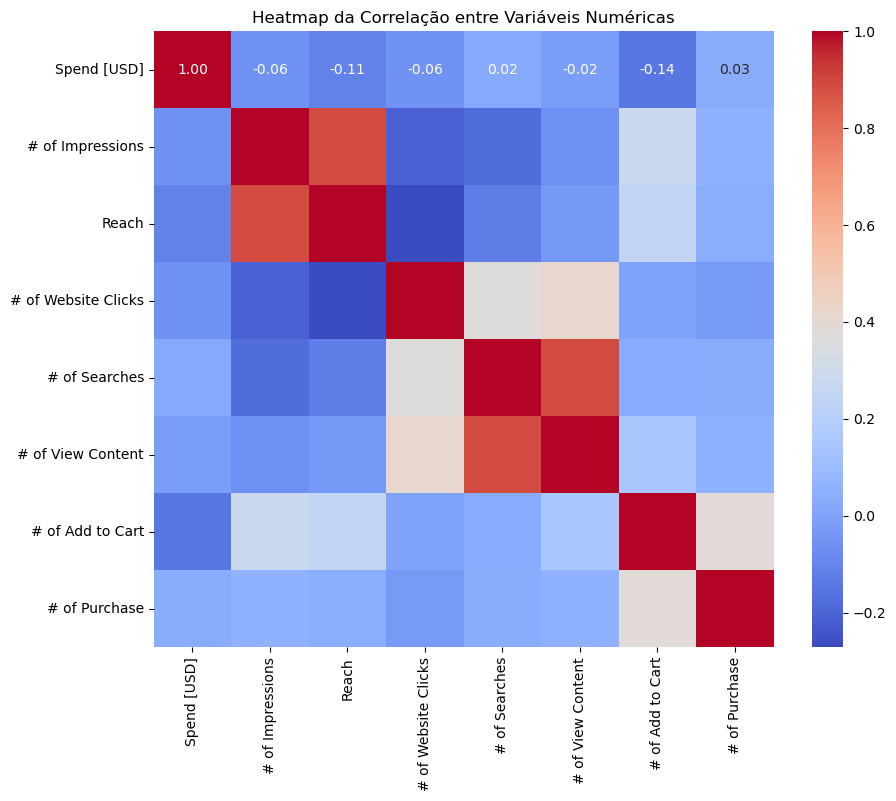

In [15]:
# Calculando a matriz de correlação
correlacao = dados.corr(numeric_only=True)

# Desenhando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap da Correlação entre Variáveis Numéricas')
plt.show()

## Teste t-student
Para determinar se houve um aumento significativo nas compras entre um grupo de controle e um grupo de teste, usaremos um  teste de hipótese, como o teste t de Student para duas amostras independentes.

O teste t de Student compara as médias de duas amostras para determinar se elas são estatisticamente diferentes uma da outra. No seu caso, você pode usar este teste para comparar as médias de compras entre o grupo de controle e o grupo de teste e verificar se existe uma diferença estatisticamente significativa.

O teste t de Student para duas amostras independentes tem certos requisitos que devem ser atendidos para produzir resultados válidos e confiáveis. **Aqui estão os principais requisitos:**

- Independência das amostras: As amostras nos grupos de controle e teste devem ser independentes umas das outras. Isso significa que a observação de um indivíduo em um grupo não afeta a observação de outro indivíduo em outro grupo.
- Normalidade das distribuições: Cada grupo deve seguir aproximadamente uma distribuição normal. Isso significa que os dados em cada grupo devem ser simétricos em torno da média, com a maioria dos valores concentrados perto da média e uma dispersão igual de valores acima e abaixo da média. Embora o teste t de Student seja robusto a desvios da normalidade, é melhor aplicado quando as distribuições são aproximadamente normais.
- Homogeneidade das variâncias: As variâncias das populações de onde as amostras foram retiradas devem ser aproximadamente iguais. Isso é conhecido como homogeneidade das variâncias. Se as variâncias forem muito diferentes entre os grupos, isso pode afetar a confiabilidade do teste.
- Escalas de medição: O teste t de Student é adequado para variáveis contínuas ou discretas que podem ser consideradas aproximadamente contínuas, desde que os requisitos acima sejam atendidos. No entanto, é importante lembrar que o teste t não é apropriado para variáveis categóricas.


##### Normalidade-Controle

In [23]:
# Mesmo tratamento feito na tabela concatenada, mas agora precisamos fazer aqui pois estamos utilizando a tabela control individualmente
control_purchase = control['# of Purchase'].dropna(how='any', axis=0)


C:\Users\mau_a\anaconda3\envs\data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


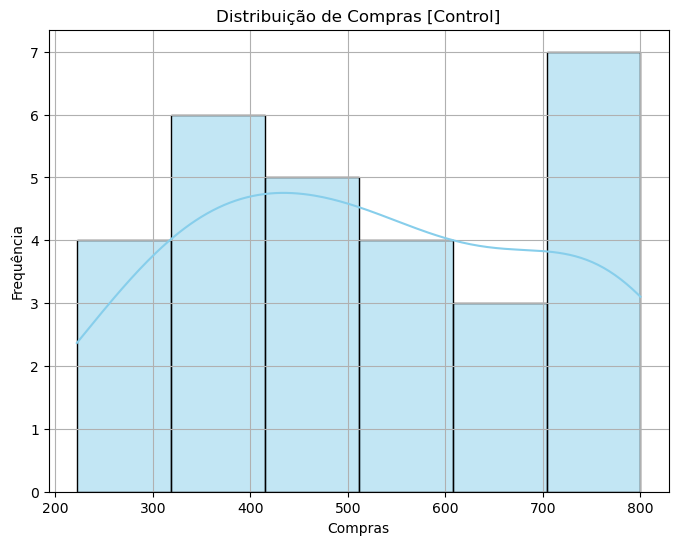

In [30]:
# Criando o gráfico de distribuição
plt.figure(figsize=(8, 6))
sns.histplot(control_purchase, kde=True, color='skyblue')
plt.title('Distribuição de Compras [Control]')
plt.xlabel('Compras')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [26]:
# Realizando o teste de Shapiro-Wilk para normalidade
stat_shapiro, p_valor = shapiro(control_purchase)

# Imprimindo os resultados do teste
print("Estatística de Shapiro-Wilk:", stat_shapiro)
print("Valor-p:", p_valor)

# Interpretando o resultado
nivel_de_significancia = 0.05
if p_valor > nivel_de_significancia:
    print("A amostra parece seguir uma distribuição normal (não podemos rejeitar a hipótese nula).")
else:
    print("A amostra não parece seguir uma distribuição normal (rejeitamos a hipótese nula).")

Estatística de Shapiro-Wilk: 0.9381418824195862
Valor-p: 0.08964364230632782
A amostra parece seguir uma distribuição normal (não podemos rejeitar a hipótese nula).


In [27]:
test_purchase = test['# of Purchase']

C:\Users\mau_a\anaconda3\envs\data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


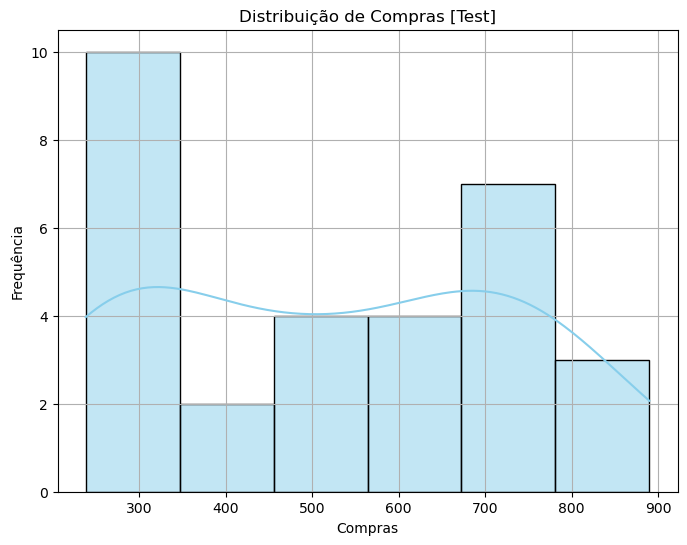

In [31]:
# Criando o gráfico de distribuição
plt.figure(figsize=(8, 6))
sns.histplot(test_purchase, kde=True, color='skyblue')
plt.title('Distribuição de Compras [Test]')
plt.xlabel('Compras')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [28]:
# Realizando o teste de Shapiro-Wilk para normalidade
stat_shapiro, p_valor = shapiro(test_purchase)

# Imprimindo os resultados do teste
print("Estatística de Shapiro-Wilk:", stat_shapiro)
print("Valor-p:", p_valor)

# Interpretando o resultado
nivel_de_significancia = 0.05
if p_valor > nivel_de_significancia:
    print("A amostra parece seguir uma distribuição normal (não podemos rejeitar a hipótese nula).")
else:
    print("A amostra não parece seguir uma distribuição normal (rejeitamos a hipótese nula).")

Estatística de Shapiro-Wilk: 0.9181894659996033
Valor-p: 0.024077769368886948
A amostra não parece seguir uma distribuição normal (rejeitamos a hipótese nula).


#### Não podemos usar o teste t-student, logo vamos utilizar seu correspondente não paramétrico o teste de Mann-Whitney U 

## O Teste de Mann-Whitney U 
Teste estatístico não paramétrico usado para determinar se há uma diferença significativa entre duas amostras independentes. Ao contrário do teste t de Student, o Teste de Mann-Whitney U não requer que os dados sigam uma distribuição normal. Aqui estão os requisitos para realizar o Teste de Mann-Whitney U:

- Amostras independentes: O teste de Mann-Whitney U compara duas amostras independentes. Isso significa que as observações em uma amostra não estão relacionadas às observações na outra amostra.
- Variáveis ordinais ou pelo menos de escala ordinal: O teste de Mann-Whitney U é adequado para variáveis que são pelo menos ordinais, ou seja, as observações podem ser classificadas ou ordenadas de alguma maneira. No entanto, ele também pode ser usado para dados de intervalo ou de razão.
- Aleatoriedade: As amostras devem ser selecionadas aleatoriamente da população de interesse. Isso garante que os resultados do teste sejam generalizáveis ​​para a população.
- Independência das observações dentro de cada amostra: As observações dentro de cada amostra devem ser independentes uma das outras. Isso significa que os valores em uma amostra não são influenciados pelos valores em outra amostra.
- Homogeneidade das formas das distribuições: Embora o teste de Mann-Whitney U não exija que as distribuições das amostras sejam normais, ele pressupõe que as duas amostras tenham formas de distribuição semelhantes.
- Em resumo, o Teste de Mann-Whitney U é uma escolha adequada quando você deseja comparar duas amostras independentes e as variáveis de interesse são ordinais ou pelo menos podem ser classificadas de alguma forma. Ele é especialmente útil quando os pressupostos do teste t de Student não são atendidos.

In [33]:
# Realizando o teste de Mann-Whitney U
estatistica_u, p_valor = mannwhitneyu(control_purchase, test_purchase)

# Imprimindo os resultados do teste
print("Estatística U de Mann-Whitney:", estatistica_u)
print("Valor-p:", p_valor)

# Interpretando o resultado
nivel_de_significancia = 0.05
if p_valor < nivel_de_significancia:
    print("Existe uma diferença significativa entre as duas amostras.")
else:
    print("Não existe uma diferença significativa entre as duas amostras.")

Estatística U de Mann-Whitney: 439.0
Valor-p: 0.957674926453464
Não existe uma diferença significativa entre as duas amostras.


### Conclusão:
-  Não há diferenças significativas entre os dois tipos de campanhas